# Analysis of Tecan plate reader data 

Data from experiments:
- 21/1/2015, 30&deg; celcius, inoculated from stationary phase, 1:100, no OD calibration (first measurements ~ blank). Looks better than 22/1
- 22/1/2015, 37&deg; celcius, inoculated from stationary phase, no OD calibration (first measurements ~ blank). No blanks.
- 8/2/2015, 30&deg; celcius, inoculated from exponential growth phase, 1:10, OD calibrated.
- 11/2/2015, 30&deg; celcius, inoculated from stationary phase, 1:20, OD calibrated.
- 24/3/2015, 30&deg; celcius, inoculated from stationary phase, 1:20, OD calibrated. Four strains, by column: GGGGRRZZZEEE.
- 26/3/2015, 37&deg; celcius, inoculated from stationary phase, 1:20, OD calibrated. Nine strains, one column each.
- 11/5/2015, 30&deg; celcius, inoculated from stationary phase, 1:20, OD calibrated. DH5alfa+GFP, DHs12+RFP, TG1+RFP, competitions between GFP and both RFP.

Standard microplate arrangement (unless otherwise mentioned):

- Wells in rows 1-4 were inoculated with bacteria with GFP plasmid
- Wells in rows 9-12 were inoculated with bacteria with RFP plasmid
- Wells in rows 5-8 were inoculated with bacteria with GFP plasmid and bacteria with RFP plasmid in equal quantities
- Wells G12 and H12 were blank (no bacteria, medium only)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import log, exp
import pandas as pd
from lmfit import Model
import seaborn as sns
sns.set_style('ticks')
sns.set_context('poster', font_scale=1.5, rc={'figure.figsize':(8.6, 5.9)})

In [2]:
import curveball

In [3]:
#filename = r"D:\workspace\curveball_project\data\dorith\20140828_dorit_hsp90_20140814_52_xyl_merge\plate_9_OD.mat"
filename = r"D:\Dropbox\ex silico\tecan\Yoav_110515_DH5a_s12_TG1.xlsx"

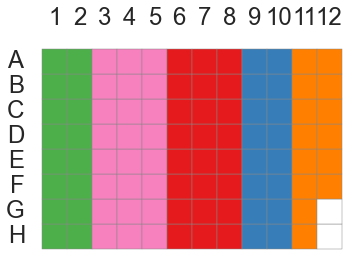

In [19]:
#plate = pd.read_csv(r"d:/workspace/curveball_project/python/plate_templates/checkerboard2.csv")
plate = pd.read_csv(r"D:/workspace/curveball_project/python/plate_templates/DH5a-s12-TG1.csv")
fig,ax = curveball.plots.plot_plate(plate)

In [20]:
reload(curveball.ioutils)
print filename
df = curveball.ioutils.read_tecan_xlsx(filename, 'OD', 3, max_time=48, plate=plate)
print df.shape
df.head()

D:\Dropbox\ex silico\tecan\Yoav_110515_DH5a_s12_TG1.xlsx
(3936, 9)


,Time,Temp. [°C],Cycle Nr.,Well,OD,Row,Col,Color,Strain
0,0.000000,30.1,1,A1,0.1338,A,1,#4daf4a,DH5a
1,0.232444,30.2,2,A1,0.1354,A,1,#4daf4a,DH5a
2,0.464861,30.1,3,A1,0.1373,A,1,#4daf4a,DH5a
3,0.697278,30.0,4,A1,0.1400,A,1,#4daf4a,DH5a
4,0.929694,30.0,5,A1,0.1444,A,1,#4daf4a,DH5a


['#4daf4a' '#377eb8' '#ff7f00' '#f781bf' '#e41a1c' '#ffffff']
['DH5a' 'DH5a+DH12S' 'DH5a+TG1' 'DH12S' 'TG1' '0']


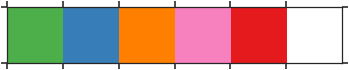

In [21]:
sns.palplot(df.Color.unique())
print df.Color.unique()
print df.Strain.unique()

In [25]:
df = df[(df.Strain=='TG1') | (df.Strain=='DH5a')]
df = df[df.Time > 0]

## OD measurements

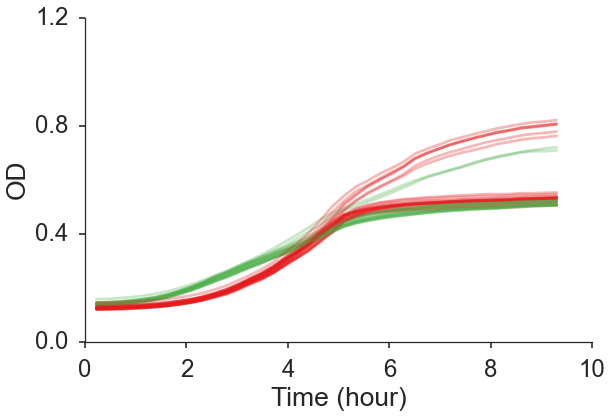

In [26]:
for well in df.Well.unique():
    df_well = df[df.Well == well]
    color = df_well.Color.unique()[0]
    plt.plot(df_well.Time, df_well.OD, color=color, alpha=0.3)
plt.xlabel('Time (hour)')
plt.ylabel('OD')
sns.despine()
plt.tight_layout()
plt.yticks([0,0.4,0.8,1.2])
plt.savefig('all_curves.png', bbox_inches='tight')

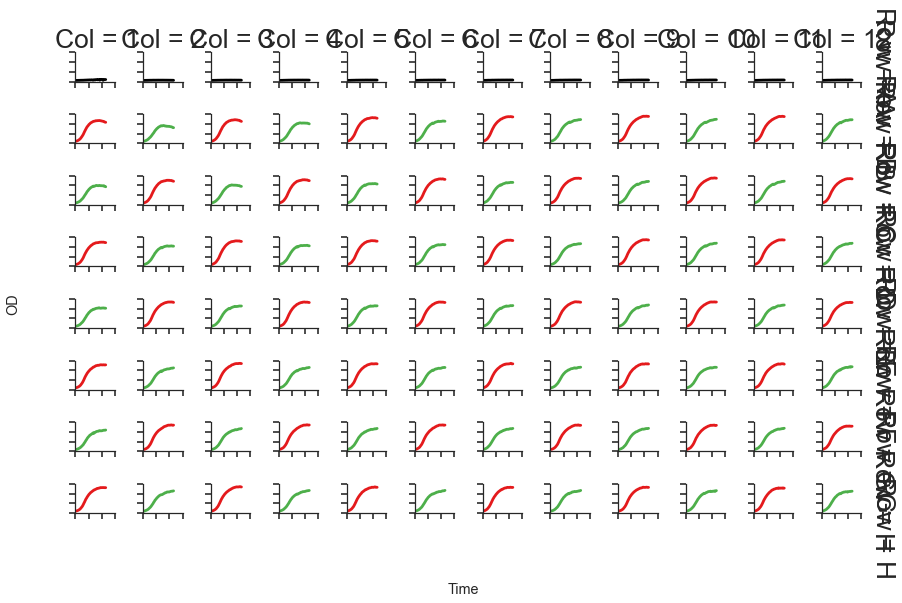

In [28]:
g = curveball.plots.plot_wells(df, 'Time', 'OD')
g.set_xticklabels([])
g.set_yticklabels([])
g.set_titles(template='{col_name} | {row_name}')
#g.savefig("96wells.png")

# Analysis

## Average gorwth curves

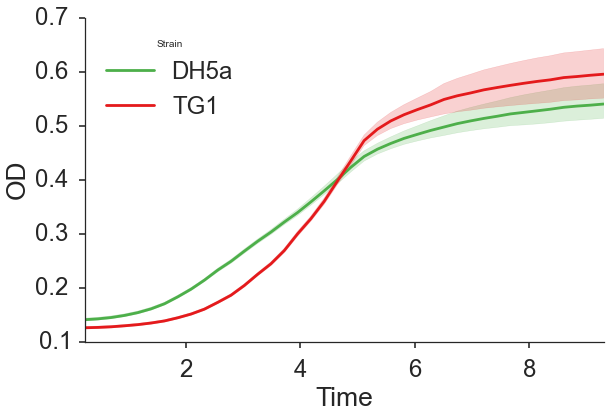

In [27]:
g = curveball.plots.tsplot(df)
fig = g.get_figure()
fig.tight_layout()
fig.savefig('tsplot.png', bbox_inches='tight')

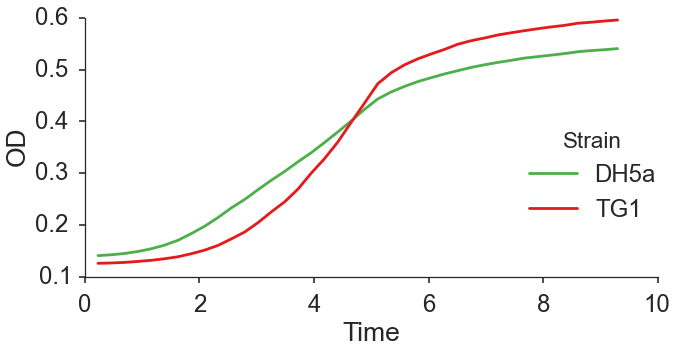

In [28]:
g = curveball.plots.plot_strains(df)
g.fig.tight_layout()
g.savefig('plot_strains.png', bbox_inches='tight')

# Model fitting

[[Model]]
    Model(baranyi_roberts_function)
[[Fit Statistics]]
    # function evals   = 224
    # data points      = 40
    # variables        = 6
    chi-square         = 1.220
    reduced chi-square = 0.036
[[Variables]]
    y0:   0.14099322 +/- 0.000914 (0.65%) (init= 0.1406062)
    r:    0.35695726 +/- 0.014315 (4.01%) (init= 0.0561628)
    K:    0.53809219 +/- 0.004890 (0.91%) (init= 0.5407625)
    nu:   2.67327575 +/- 0.280982 (10.51%) (init= 1)
    q0:   0.02757464 +/- 0.012887 (46.74%) (init= 1)
    v:    3.27829809 +/- 0.457076 (13.94%) (init= 1)

Model(baranyi_roberts_function) 6
Model(baranyi_roberts_function) 5
Model(richards_function) 4
Model(logistic_function) 3


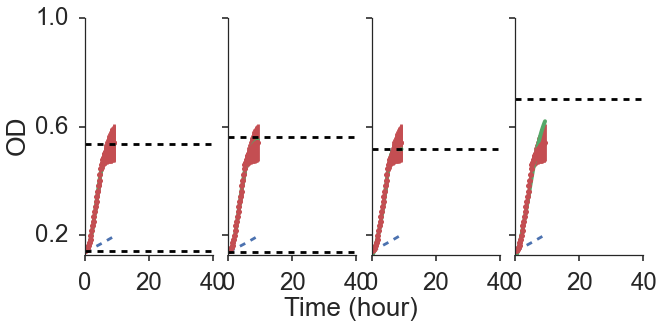

In [29]:
G_models,fig,ax = curveball.models.fit_model(df[df.Strain=='DH5a'], use_weights=True)
plt.setp(ax, title='')
plt.setp(ax, xticks=[0,20,40])
plt.setp(ax, yticks=[0.2,0.6,1.0])
plt.setp(ax, xlabel='')
fig.text(0.4, -0.1, 'Time (hour)', fontsize=26)
fig.tight_layout()
fig.set_figwidth(8.6)
fig.set_figheight(5.9*2/3.)
fig.savefig("G_models.png", bbox_inches='tight')
for m in G_models:
    print m.model.name, m.nvarys

[[Model]]
    Model(baranyi_roberts_function)
[[Fit Statistics]]
    # function evals   = 194
    # data points      = 40
    # variables        = 6
    chi-square         = 0.832
    reduced chi-square = 0.024
[[Variables]]
    y0:   0.12506697 +/- 0.000625 (0.50%) (init= 0.1256625)
    r:    0.48267228 +/- 0.022411 (4.64%) (init= 0.05418067)
    K:    0.57131408 +/- 0.004681 (0.82%) (init= 0.5961042)
    nu:   4.18807334 +/- 0.542640 (12.96%) (init= 1)
    q0:   0.03380508 +/- 0.004979 (14.73%) (init= 1)
    v:    1.59459449 +/- 0.113092 (7.09%) (init= 1)

Model(baranyi_roberts_function) 6
Model(baranyi_roberts_function) 5
Model(logistic_function) 3
Model(richards_function) 4


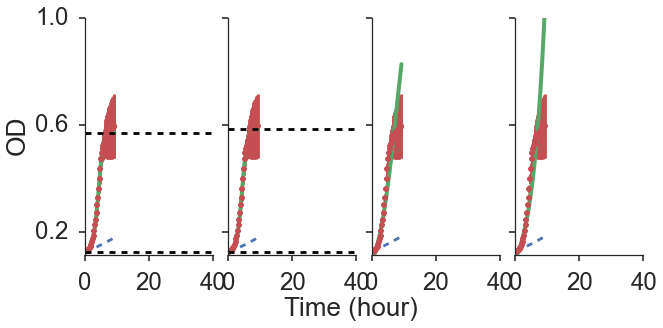

In [30]:
R_models,fig,ax = curveball.models.fit_model(df[df.Strain=='TG1'])
plt.setp(ax, title='')
plt.setp(ax, xticks=[0,20,40])
plt.setp(ax, yticks=[0.2,0.6,1.0])
plt.setp(ax, xlabel='')
fig.text(0.4, -0.1, 'Time (hour)', fontsize=26)
fig.tight_layout()
fig.set_figwidth(8.6)
fig.set_figheight(5.9*2/3.)
fig.savefig("R_models.png", bbox_inches='tight')
for m in R_models:
    print m.model.name, m.nvarys

In [31]:
print "G:"
print G_models[0].best_values, 
print "lag:", curveball.models.find_lag(G_models[0], PLOT=False), 
print "mu:", curveball.models.find_max_growth(G_models[0], PLOT=False)[-1]

print "R:"
print R_models[0].best_values,
print "lag:", curveball.models.find_lag(R_models[0], PLOT=False), 
print "mu:", curveball.models.find_max_growth(R_models[0], PLOT=False)[-1]

G:
{'q0': 0.027574644153067197, 'K': 0.53809219585949752, 'r': 0.35695726671951777, 'v': 3.2782980994796316, 'y0': 0.14099322992277696, 'nu': 2.6732757582358029} lag: 1.48180211119 mu: 0.309701947362
R:
{'q0': 0.033805084185910717, 'K': 0.57131408066730716, 'r': 0.48267228273621643, 'v': 1.5945944911847463, 'y0': 0.12506697396710997, 'nu': 4.1880733405849888} lag: 2.58776730947 mu: 0.415996102213


In [33]:
G_color = plate.Color[plate.Strain=='DH5a'].unique()[0]
R_color = plate.Color[plate.Strain=='TG1'].unique()[0]

In [34]:
gm = G_models[0]
rm = R_models[0]

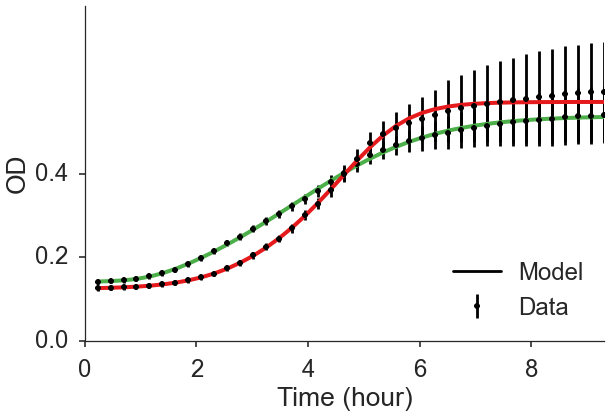

In [41]:
fig,ax = plt.subplots(1, 1)

ax.plot([-1],[0], color='k', label='Model')
ax.plot(df.Time.unique(), gm.best_fit, color=G_color, lw=4)
ax.errorbar(df.Time.unique(), gm.data, 1./gm.weights, color='k', ls='', marker='.', label='Data')
ax.plot(df.Time.unique(), rm.best_fit, color=R_color, lw=4)
ax.errorbar(df.Time.unique(), rm.data, 1./rm.weights, color='k', ls='', marker='.')

ax.set_xlim(0, df.Time.max())
ax.legend(loc='lower right')
#ax.legend().set_visible(False)
ax.set_ylabel('OD')
ax.set_xlabel('Time (hour)')
ax.set_title('')
ax.set_yticks([0,0.2,0.4])
sns.despine()
fig.tight_layout()
fig.savefig('model_fits.png', bbox_inches='tight')

# Competition simulation

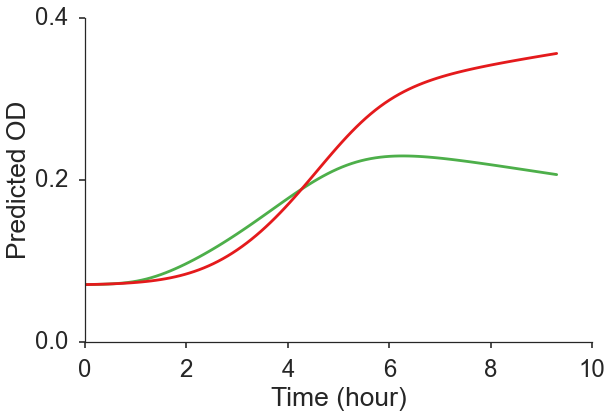

In [40]:
t,y,fig,ax = curveball.competitions.compete(G_models[0], R_models[0], hours=df.Time.max(), PLOT=True)
ax.lines[0].set_color(G_color)
ax.lines[1].set_color(R_color)
ax.set_yticks([0,0.2,0.4])
ax.set_ylabel('Predicted OD')
#ax.legend(["G","R"], loc='lower right')
#ax.set_title("G vs R")
fig.tight_layout()
fig.savefig("competition.png", bbox_inches='tight')

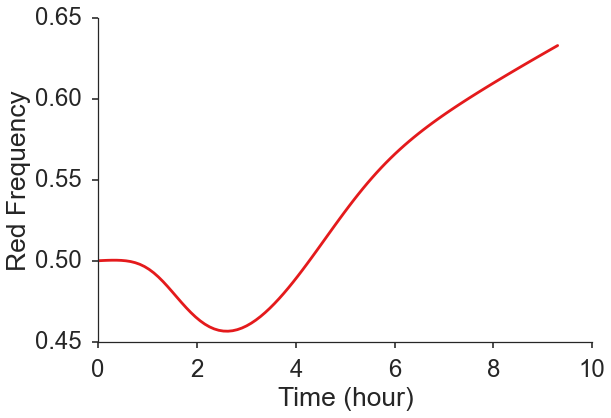

In [42]:
p = y[:,1] / y.sum(axis=1)
plt.plot(t, p, color=R_color)
plt.xlabel('Time (hour)')
plt.ylabel('Red Frequency')
sns.despine()
plt.tight_layout()
plt.savefig("frequency.png", bbox_inches='tight')

LTEE (Wiser & Lenski 2015):
$$
s = 1 - \frac{\log{\frac{A_t}{A_0}}}{\log{\frac{B_t}{B_0}}} = 1 - \frac{\log{A_t} - \log{A_0}}{\log{B_t} - \log{B_0}}
$$

Chevin 2011:
$$
s = \frac{d}{dt} \log{\frac{p}{1-p}}
$$

Kimura & Crow 1970:
$$
s = \frac{1}{t} \log{\frac{A_t B_0}{A_0 B_t}} = \frac{\log{A_t} + \log{B_0} - \log{A_0} - \log{B_t}}{t}
$$

In [43]:
s_LTEE = lambda i: 1 - np.log(y[i,0]/(y[0,0])) / np.log(y[i,1]/y[0,1])
s_KC70 = lambda i: 1./t[i] * np.log(y[i,1] * y[0,0] / (y[0,1] * y[i,0])) 
s = lambda p,t: np.gradient(np.log(y[:,1]/y[:,0]), t)

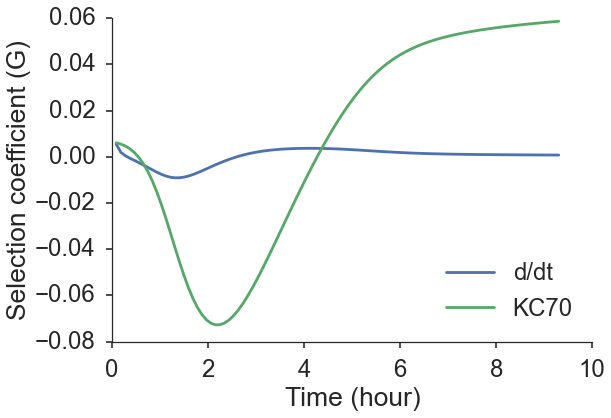

In [44]:
plt.plot(t, s(p,t), label='d/dt')
#plt.plot(t[1:], [s_LTEE(i) for i in range(1,len(t))], '--', label='LTEE')
plt.plot(t[1:], [s_KC70(i) for i in range(1,len(t))], label='KC70')

plt.xlabel('Time (hour)')
plt.ylabel('Selection coefficient (G)')
plt.legend(loc='lower right')
sns.despine()
plt.tight_layout()
plt.savefig("selection_coefficient.png", bbox_inches='tight')

<Parameter 'y0', value=0.44335407147299843 +/- 0.00516, bounds=[-inf:inf]>
<Parameter 'K', value=1 (fixed), bounds=[-inf:inf]>
<Parameter 'r', value=0.077792301714248557 +/- 0.00394, bounds=[-1:1]>


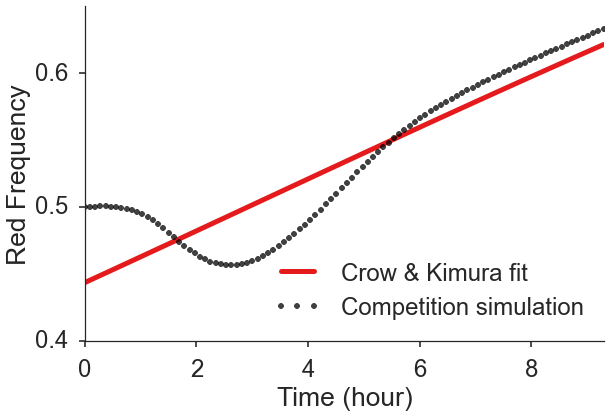

In [48]:
params = curveball.models.logistic_model.make_params(y0=p.min(), K=1, r=0)
params['r'].set(min=-1,max=1)
params['K'].set(vary=False)
params['y0'].set(vary=True)
fit = curveball.models.logistic_model.fit(p, t=t, params=params)
ax = fit.plot_fit(
    data_kws={'marker':'.', 'color':'k', 'alpha':0.75}, 
    fit_kws={'lw':5, 'color':R_color}, 
    init_kws={'ls':''}
)
ax.get_lines()[0].set_label('')
ax.get_lines()[1].set_label('Crow & Kimura fit')
ax.get_lines()[2].set_label('Competition simulation')
ax.set_xlim(0,df.Time.max())
ax.legend(loc='lower right', numpoints=3)#.set_visible(False)
ax.set_title('')
ax.set_ylabel('Red Frequency')
ax.set_xlabel('Time (hour)')
ax.set_yticks([0.4,0.5,0.6])
sns.despine()
print fit.params['y0']
print fit.params['K']
print fit.params['r']
plt.tight_layout()
ax.figure.savefig('frequency_fit.png', bbox_inches='tight')